3425072480285518062
this node has 6 children
move:(5, 7), runs: 20319260, eval:+0.2542, principal:57 65 18 56 62 27 85 76 41 33 12 38 08 28 86 61 05 17 54 83 80 72 
move:(5, 6), runs:  7969281, eval:+0.2533, principal:56 82 66 12 57 83 70 52 77 33 22 78 48 38 28 76 32 08 18 58 68 17 
move:(3, 8), runs:    86250, eval:+0.2078, principal:38 08 26 82 66 12 37 03 22 76 32 27 85 67 05 18 57 74 
move:(3, 7), runs:    63855, eval:+0.1917, principal:37 13 52 66 12 57 85 76 32 08 18 48 38 27 75 58 68 
move:(4, 8), runs:    46379, eval:+0.1680, principal:48 57 85 66 12 37 03 22 76 32 18 58 88 68 08 27 75 38 26 
move:(5, 8), runs:    24974, eval:+0.0940, principal:58 66 12 57 85 76 32 08 27 75 37 03 22 86 

57 65 18 56 62 27 85 76 41 33 12 38 08 28 86 61 05 17 54 83 80 72 48 37 03 20 70 52 88 78 58 68 26 82 77 35 55 66 22 67 13 32 34 25 14 53 45 75 23 44 


KeyboardInterrupt: 

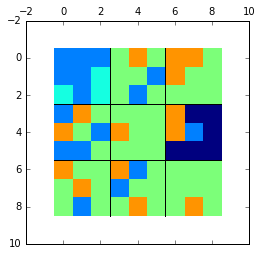

In [6]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import MC
from MC import MC_node,mc_sim
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,7),(3,6),(7,1),(8,7)]:
    board[x]=1
for o in [(0,0),(0,1),(4,7),(8,1)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(0,6),(1,0),(3,1),(2,4),(6,3),(1,1),(4,3),(3,0),(2,1),(6,4),(0,4),(1,5),(4,6),(5,1),(8,4),
             (7,3),(4,0),(5,0),(6,0),(0,2),(1,6),(4,2),(5,7)]:
    game.update_move(move)
log_len = len(game.log)

root = MC_node(game,1)

tact.fancy_board(game)

mc_sim(root,game,branch = 50,passes = 100000000)

nodes visited   50
cache space     30000034
nodes stored    42
nodes forgotten 0
current depth   0
current node    
role: max
  root: work:        28 pn0:    INF pn1:      0 dn0:      0 dn1:    INF 

role: min
(7, 8): work:        12 pn0:    INF pn1:      7 dn0:      0 dn1:      2 
(6, 7): work:         8 pn0:    INF pn1:      0 dn0:      0 dn1:    INF 
(7, 7): work:         7 pn0:    INF pn1:    INF dn0:      0 dn1:      0 

time 0.00149648370086
p2win


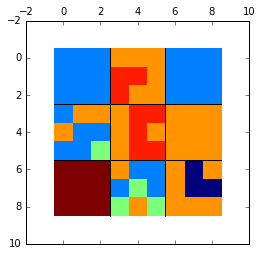

In [20]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn_multi as dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,7),(3,6),(7,1),(8,7)]:
    board[x]=1
for o in [(0,0),(0,1),(4,7),(8,1)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(0,6),(1,0),(3,1),(2,4),(6,3),(1,1),(4,3),(3,0),(2,1),(6,4),(0,4),(1,5),(4,6),(5,1),(8,4),
             (7,3),(4,0),(5,0),(6,0),(0,2),(1,6),(4,2),(5,7),(6,5),(1,8),(4,8),(5,6),(7,0),(3,2),(0,8),
             (2,7),(7,5),(3,8),(2,6),(7,2),(3,7),(0,5),(1,7),(4,5),(5,8),(6,8),(2,8),(6,6),(2,0),(8,0),
             (8,2),(7,6),(4,1),(3,3),(2,2),(8,6),(6,2),(0,3),(1,2),(5,3),(6,1),(2,5),(8,8)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()

tact.fancy_board(game)
t0 = time.clock()
# cProfile.run('node,tree = dfpn.solve(game,root = True,epsilon=1.1)',sort = 'tottime')
node,tree = dfpn.solve(game,3,{1:0,0:1,-1:2,2:1,-2:1},1,root = True,epsilon=1.02)
print 'time',time.clock() - t0
print tree

In [2]:
with open('thankful.txt','w') as file_:
    file_.write(tree)